In [99]:
import pandas as pd
from pricing.pipeline_builder import CSVDataLoader, DataProcessor
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data

In [54]:
path = "./data/03-06-2024"

procesor = DataProcessor()
df_ads = procesor.process_data(path)

## Data Exploration

In [35]:
len(df_ads[df_ads["model"] == "11pro"])

14

In [55]:
procesor.invalid_data

{'models': 4, 'roms': 0, 'battery': 565, 'locked': 0}

In [56]:
df_ads["warranty"].value_counts()

warranty
False    872
True      95
Name: count, dtype: int64

In [28]:
df_ads.head(20)

,model,rom,battery,warranty,locked,price
0,11pro,64,78,False,False,180
1,11,128,82,False,False,250
2,11,64,72,False,False,180
3,11,128,75,False,False,180
4,11pro,64,70,False,False,190
5,11,64,80,False,False,249
6,11,64,83,False,False,220
7,11,64,77,True,False,200
8,11,64,100,False,False,399
9,11,64,88,False,False,250


In [57]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     967 non-null    object
 1   rom       967 non-null    object
 2   battery   967 non-null    int32 
 3   warranty  967 non-null    bool  
 4   locked    967 non-null    bool  
 5   price     967 non-null    int32 
dtypes: bool(2), int32(2), object(2)
memory usage: 24.7+ KB


In [10]:
# NaN rom popuniti s most frequent

df_ads["rom"].unique()

array(['64', '128', nan, '256', '512'], dtype=object)

In [11]:
df_ads["rom"].value_counts()

rom
128    296
256    142
64     141
512     19
Name: count, dtype: int64

In [9]:
df_ads["rom"].mode().iloc[0]

'128'

In [12]:
df_ads["rom"] = df_ads["rom"].fillna(df_ads["rom"].mode().iloc[0])
df_ads["rom"].isna().sum()

0

In [9]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     807 non-null    object
 1   rom       815 non-null    object
 2   battery   515 non-null    object
 3   warranty  815 non-null    bool  
 4   locked    815 non-null    bool  
 5   price     815 non-null    int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 27.2+ KB


In [13]:
# Fill na model with ffill

df_ads["model"].ffill(inplace=True)
df_ads["model"].isna().sum()

0

In [14]:
df_ads["model"].unique()

array(['11', '11pro', '11promax', '12', '12pro', '12promax', '13',
       '13pro', '14pro', '13promax', '13max', '14', '14promax'],
      dtype=object)

In [12]:
df_ads["model"].value_counts()

model
11          125
13           92
12           87
12pro        83
13pro        81
13promax     69
12promax     53
11pro        49
14           49
14promax     47
14pro        45
11promax     32
13max         2
12max         1
Name: count, dtype: int64

Removing invalid model information

In [15]:
modeli = ['11', 
          '11pro', 
          '11promax', 
          '12', 
          '12pro', 
          '12promax', 
          '13', 
          '13pro', 
          '13promax', 
          '14', 
          '14pro', 
          '14promax']
romovi = ['64', '128', '256', '512']

df_ads = df_ads.drop(index=df_ads[~df_ads["model"].isin(modeli)].index)
df_ads = df_ads.drop(index=df_ads[~df_ads["rom"].isin(romovi)].index)

In [16]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 720 entries, 0 to 720
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     720 non-null    object
 1   rom       720 non-null    object
 2   battery   452 non-null    object
 3   warranty  720 non-null    bool  
 4   locked    720 non-null    bool  
 5   price     720 non-null    int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 29.5+ KB


In [58]:
df_ads_batt = df_ads.dropna()

In [17]:
df_ads_batt.drop(index=df_ads_batt[df_ads_batt["price"]>1500].index, inplace=True)

C:\Users\kanpe\AppData\Local\Temp\ipykernel_12868\3171520850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads_batt.drop(index=df_ads_batt[df_ads_batt["price"]>1500].index, inplace=True)


In [16]:
df_ads_batt.describe()

,price
count,515.000000
mean,471.221359
std,208.533404
min,60.000000
25%,300.000000
50%,450.000000
75%,600.000000
max,1300.000000


In [542]:
df_ads["battery"].ffill(inplace=True)

In [22]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 0 to 814
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     812 non-null    object
 1   rom       812 non-null    object
 2   battery   515 non-null    object
 3   warranty  812 non-null    bool  
 4   locked    812 non-null    bool  
 5   price     812 non-null    int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 33.3+ KB


In [21]:
df_ads = df_ads.dropna()

In [18]:
df_ads_batt["battery"] = df_ads_batt["battery"].astype("int")
df_ads_batt["rom"] = df_ads_batt["rom"].astype("int")
df_ads_batt["warranty"] = df_ads_batt["warranty"].astype("int")

C:\Users\kanpe\AppData\Local\Temp\ipykernel_10072\3881907325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads_batt["battery"] = df_ads_batt["battery"].astype("int")
C:\Users\kanpe\AppData\Local\Temp\ipykernel_10072\3881907325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads_batt["rom"] = df_ads_batt["rom"].astype("int")
C:\Users\kanpe\AppData\Local\Temp\ipykernel_10072\3881907325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [10]:
df_ads["battery"] = df_ads["battery"].astype("int")
df_ads["rom"] = df_ads["rom"].astype("int")
#df_ads["warranty"] = df_ads["warranty"].astype("int")

In [19]:
df_ads_batt.describe()

,rom,battery,warranty,price
count,452.000000,452.000000,452.000000,452.000000
mean,157.168142,87.026549,0.092920,468.349558
std,91.909423,6.439154,0.290642,212.485955
min,64.000000,67.000000,0.000000,99.000000
25%,128.000000,84.000000,0.000000,300.000000
50%,128.000000,87.000000,0.000000,430.000000
75%,256.000000,90.000000,0.000000,600.000000
max,512.000000,100.000000,1.000000,1300.000000


In [20]:
df_ads_batt["battery"] = df_ads_batt["battery"].drop(index=df_ads_batt[df_ads_batt["battery"] < 60].index)
#df_ads["battery"] = df_ads["battery"].drop(index=df_ads[df_ads["battery"] < 60].index)

C:\Users\kanpe\AppData\Local\Temp\ipykernel_14732\1538346563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads_batt["battery"] = df_ads_batt["battery"].drop(index=df_ads_batt[df_ads_batt["battery"] < 60].index)


In [20]:
import numpy as np
from scipy import stats

In [25]:
df_ads_grouped = df_ads.groupby(["model"], as_index=True)
df_ads_batt_grouped = df_ads_batt.groupby(["model"], as_index=True)

In [46]:
df_ads_batt_grouped.get_group("14promax").describe()

,rom,battery,warranty,price
count,49.000000,49.000000,49.000000,49.000000
mean,185.469388,96.306122,0.448980,949.326531
std,101.399191,4.783670,0.502545,89.789195
min,128.000000,80.000000,0.000000,770.000000
25%,128.000000,93.000000,0.000000,900.000000
50%,128.000000,99.000000,0.000000,950.000000
75%,256.000000,100.000000,1.000000,999.000000
max,512.000000,100.000000,1.000000,1200.000000


In [213]:
df = df_ads_grouped.get_group("11")
iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)
lim = np.abs((df["price"] - df["price"].median()) / iqr) < 2.22
df.drop(index=df[~lim].index)

,model,rom,battery,warranty,locked,price
1,11,64,81.0,0,False,230
2,11,64,81.0,0,False,230
3,11,128,77.0,0,False,250
4,11,64,88.0,0,False,180
5,11,64,86.0,0,False,300
...,...,...,...,...,...,...
165,11,128,75.0,0,False,399
166,11,64,76.0,0,False,135
167,11,128,79.0,0,False,279
168,11,128,79.0,0,False,380


In [ ]:
list_dfs = []
for model in modeli:
    df = df_ads_grouped.get_group(model)
    iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)
    lim = np.abs((df["price"] - df["price"].median()) / iqr) < 2.22
    list_dfs.append(df.drop(index=df[~lim].index))
    
df_adsN = pd.concat(list_dfs, ignore_index=True)


In [216]:
df_adsN_grouped = df_adsN.groupby(["model"])

Analysing how different methods of NaN management will influence the correlation of 
Battery information and price

In [21]:
df_ads.corr(numeric_only=True)

,warranty,locked,price
warranty,1.000000,NaN,0.137876
locked,NaN,NaN,NaN
price,0.137876,NaN,1.000000


In [238]:
df_adsN.corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.179228,0.066123,NaN,0.458993
battery,0.179228,1.000000,0.375920,NaN,0.596507
warranty,0.066123,0.375920,1.000000,NaN,0.413540
locked,NaN,NaN,NaN,NaN,NaN
price,0.458993,0.596507,0.413540,NaN,1.000000


In [25]:
df_ads_batt.corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.203030,0.135423,NaN,0.463345
battery,0.203030,1.000000,0.332951,NaN,0.540449
warranty,0.135423,0.332951,1.000000,NaN,0.380841
locked,NaN,NaN,NaN,NaN,NaN
price,0.463345,0.540449,0.380841,NaN,1.000000


In [221]:
df_adsN_grouped.get_group("12").corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.084341,0.113039,NaN,0.301019
battery,0.084341,1.000000,0.027717,NaN,0.076052
warranty,0.113039,0.027717,1.000000,NaN,0.038040
locked,NaN,NaN,NaN,NaN,NaN
price,0.301019,0.076052,0.038040,NaN,1.000000


In [26]:
df_ads_grouped.get_group("12").corr(numeric_only=True)

,warranty,locked,price
warranty,1.000000,NaN,0.756379
locked,NaN,NaN,NaN
price,0.756379,NaN,1.000000


In [27]:
df_ads_batt_grouped.get_group("12").corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.120266,NaN,NaN,0.179620
battery,0.120266,1.000000,NaN,NaN,0.309239
warranty,NaN,NaN,NaN,NaN,NaN
locked,NaN,NaN,NaN,NaN,NaN
price,0.179620,0.309239,NaN,NaN,1.000000


<Axes: >

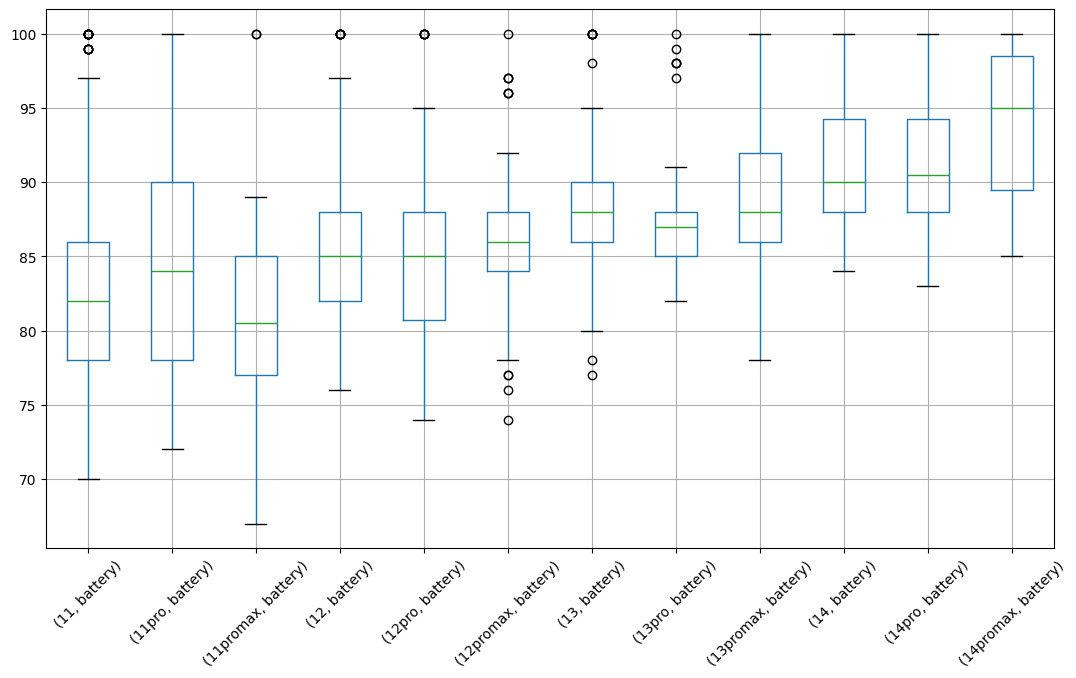

In [59]:
df_ads_batt[["battery", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                   rot=45,
                                                   subplots=False
                                                   )

In [60]:
df_adsN[["price", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                   rot=45,
                                                   subplots=False
                                                   )

NameError: name 'df_adsN' is not defined

<Axes: >

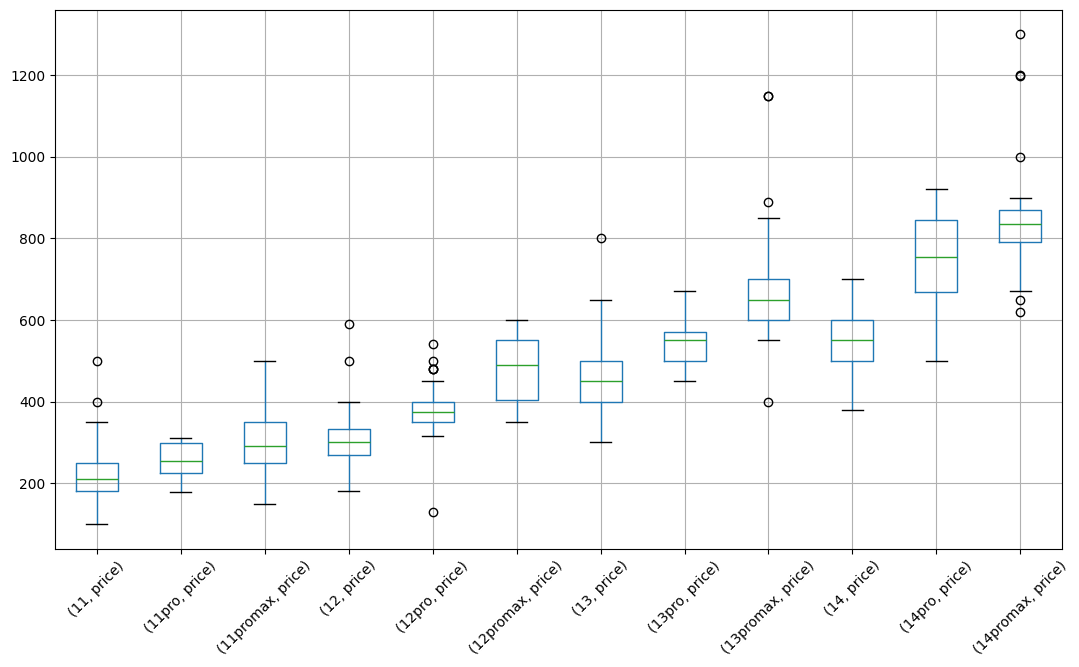

In [44]:
df_ads_batt[["price", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                           rot=45,
                                                        subplots=False
                                                        )

Calculation Pearson Correlation Coefficient and significance of the correlation.

In [33]:
pearson_coef, p_value = stats.pearsonr(df_ads_batt_grouped.get_group("14")['battery'], df_ads_batt_grouped.get_group("14")['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.48922087925029745  with a P-value of P = 0.013068296367316934


In [ ]:
df_adsN.dropna(inplace=True)
df_ads.dropna(inplace=True)

In [ ]:
df_ads_batt.dropna(inplace=True)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_ads['rom'], df_ads['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

In [272]:
df_models = pd.get_dummies(df_ads["rom"])
df_models = df_models.astype("int")

In [273]:
df_ads = pd.concat([df_ads, df_models], axis=1)

In [264]:
#df_ads = df_ads.drop(modeli, axis=1)
df_ads = df_ads.dropna()

In [550]:
df_ads[["rom", "battery", "warranty", "price"]] = df_ads[["rom", "battery", "warranty", "price"]].astype("int")

In [65]:
df_ads_batt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     967 non-null    object
 1   rom       967 non-null    object
 2   battery   967 non-null    int32 
 3   warranty  967 non-null    bool  
 4   locked    967 non-null    bool  
 5   price     967 non-null    int32 
dtypes: bool(2), int32(2), object(2)
memory usage: 24.7+ KB


In [61]:
import seaborn as sns

<Axes: xlabel='battery', ylabel='price'>

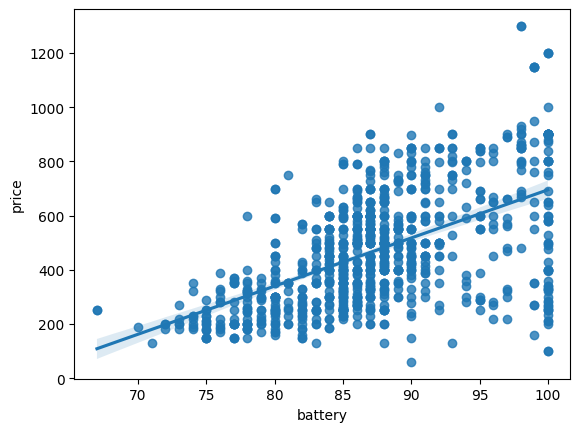

In [62]:
sns.regplot(x="battery", y="price", data=df_ads_batt)

In [ ]:
sns.residplot(x=df_ads_grouped.get_group("14promax")["battery"], y=df_ads_grouped.get_group("14promax")["price"])

# Model Development

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer


In [118]:
X = df_ads_batt[["model", "rom", "battery", "warranty"]]
y = df_ads_batt["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

preprocessor = ColumnTransformer(
    transformers=[
        ("model", OneHotEncoder(), ["model"]),
        ("rom", OneHotEncoder(), ["rom"])
    ],
    remainder="passthrough"
)

pipe = Pipeline([("preprocessor", preprocessor), 
                 ("polynomial", PolynomialFeatures(degree=3, include_bias=False)), 
                 ("model", LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('model', OneHotEncoder(),
                                                  ['model']),
                                                 ('rom', OneHotEncoder(),
                                                  ['rom'])])),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [119]:
pipe.score(X_train, y_train)

0.9080297916054236

In [120]:
pipe.score(X_test, y_test)

0.8941883853846728

In [121]:
Yhat_train = pipe.predict(X_train)
Yhat_test = pipe.predict(X_test)
Yhat = pipe.predict(X)

In [70]:
print('predicted: ', Yhat_test[0:10])
print('test set :', y_test[0:10].values)

predicted:  [888.01711264 304.46987919 258.89451414 607.28811349 370.91200353
 303.99824851 551.63497132 304.46987919 372.77080218 488.1112135 ]
test set : [900 300 270 600 430 300 600 260 380 550]


## XGBoost

In [71]:
from xgboost import XGBRegressor

In [123]:
X = df_ads_batt[["model", "rom", "battery", "warranty"]]
y = df_ads_batt["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ("model", OneHotEncoder(), ["model"]),
        ("rom", OneHotEncoder(), ["rom"])
    ],
    remainder="passthrough"
)

pipe = Pipeline([("preprocessor", preprocessor), 
                 #("polynomial", PolynomialFeatures(degree=3, include_bias=False)),
                 ("model", XGBRegressor())]) #eta=0.3, n_estimators=500, max_depth=5, objective="reg:squarederror"

pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('model', OneHotEncoder(),
                                                  ['model']),
                                                 ('rom', OneHotEncoder(),
                                                  ['rom'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [124]:
pipe.score(X_train, y_train)

0.9508061232488936

In [125]:
pipe.score(X_test, y_test)

0.9538782654272835

In [126]:
Yhat_train = pipe.predict(X_train)
Yhat_test = pipe.predict(X_test)
Yhat = pipe.predict(X)

In [127]:
print('predicted:', np.round(Yhat_test[25:40]))
print('test set :', y_test[25:40].values)

predicted: [194. 445. 422. 898. 544. 445. 609. 131. 155. 895. 847. 609. 593. 273.
 528.]
test set : [170 400 415 900 550 500 500 130 150 880 850 600 650 245 500]


## Model Analysis

<Axes: ylabel='Density'>

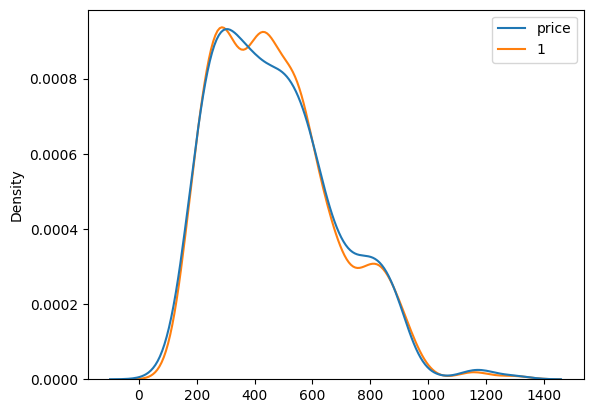

In [79]:
sns.kdeplot(data=(y, Yhat))

<Axes: ylabel='Density'>

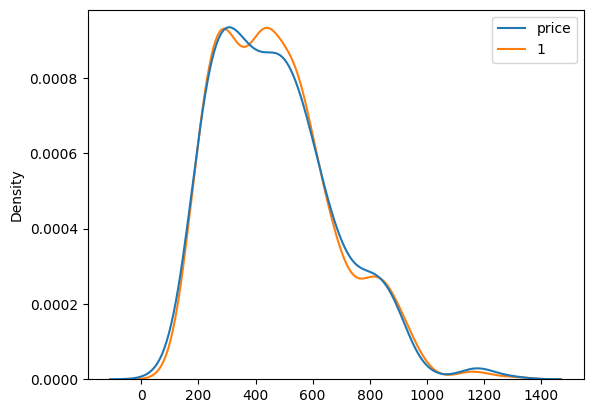

In [80]:
sns.kdeplot(data=(y_train, Yhat_train))

<Axes: ylabel='Density'>

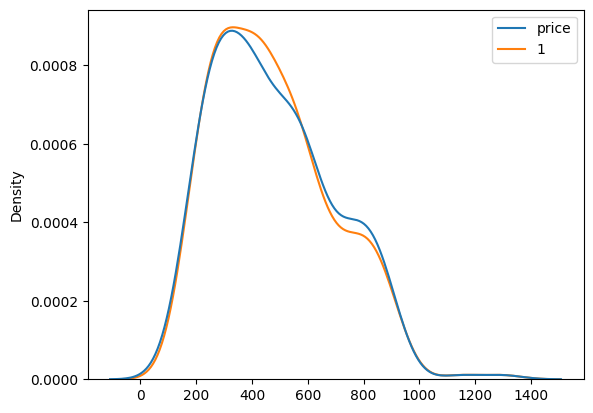

In [81]:
sns.kdeplot(data=(y_test, Yhat_test))

In [102]:
import os

In [47]:
os.chdir("c:/Users/kanpe/Documents/Python/used-iphone-pricing-tool/pricing-tool/")

In [103]:
import pickle
import pandas as pd

In [104]:
# Save trained model

with open("./pricing/model-data/reg03-06-1xgb.pkl", "wb") as file:
    pickle.dump(pipe, file)

## Predicting with trained model

In [54]:
# Open pretrained model

with open('./pricing/model-data/reg03-06-100.pkl', 'rb') as file:
    reg1312 = pickle.load(file)

In [104]:
podaci = pd.DataFrame({"battery":[87], 
                       "rom": [128], 
                       "model": ["13"]
                       })


predictions = reg1312.predict(podaci)
print(predictions[0], predictions[0]*0.87)

419.87200530113284 365.28864461198555


In [107]:
with open('./pricing/model-data/reg03-06-1xgb.pkl', 'rb') as file:
    xgbreg = pickle.load(file)

In [117]:
podaci = pd.DataFrame({"battery":[88], 
                       "rom": ["128"], 
                       "model": ["13"],
                       "warranty": [0]
                       })


predictions = xgbreg.predict(podaci)
print(predictions[0], predictions[0]*0.87)

426.4553 371.01610382080077
